### IMPORT
#### Importo funciones de src para dibujar funciones y para categorizar las columnas con strings comunes

In [1]:
import pandas as pd

from datetime import datetime

import numpy as np

import sys

import re

import warnings
warnings.simplefilter('ignore')

sys.path.append(r'../src')

from src import getGraphic, getDic, setChange, setSpecie

### LET'S READY
#### Carga el csv y trabajo con una copia. Modifico el nombre de las columnas y su extensión de muestra head

In [2]:
df_original = pd.read_csv('../data/attacks.csv', encoding = 'latin1')

df = df_original.copy()

pd.set_option('display.max_columns', None)

#Let's rename columns names for avoid spaces, uppercases, points, etc.

df.columns=[c.lower().replace(' ','_').replace(':','').replace('.','_').replace('(','').replace(')','').replace('/','') for c in df.columns]

<AxesSubplot:>

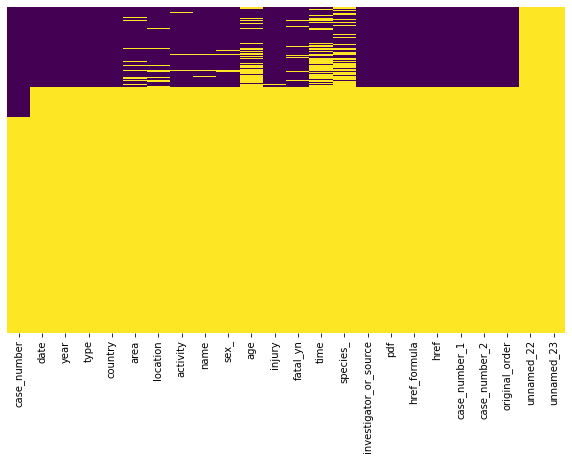

In [3]:
getGraphic(df)

### WORKING SUBSET AND DROP
#### En standby para testear

In [4]:
'''subset_util = list(df.columns)[1:-3]

df_rowsnull = df[df[subset_util].isnull().all(1)]

index_rowsnull = list(df_rowsnull.index)

df.drop(index_rowsnull, axis = 0, inplace = True)

df_rowsnull.info()'''

'subset_util = list(df.columns)[1:-3]\n\ndf_rowsnull = df[df[subset_util].isnull().all(1)]\n\nindex_rowsnull = list(df_rowsnull.index)\n\ndf.drop(index_rowsnull, axis = 0, inplace = True)\n\ndf_rowsnull.info()'

### FAIL NECESITO SABER CÓMO HACER ESTO

In [5]:
df.date.fillna('unknown date', inplace = True)

### ACTIVITY column
#### Palabras clave buscadas y categorizadas, los null unknown como no

<AxesSubplot:>

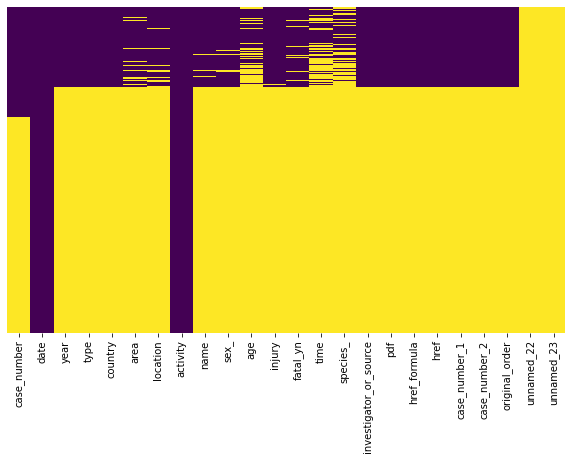

In [6]:
df['activity'].fillna('Unknown activity near water', inplace = True)

df['activity'][(df['activity']=='.') | (df['activity']=='unknown')] = 'Unknown activity near water'

lst_activity = ['murder','boarding','snorkeling','standing','surfing','swimming',
                'fishing','diving','bathing','wading','skiing','kayaking']

setChange(df,'activity',lst_activity)

getGraphic(df)

### NAME column
#### Los null directamente anónimos, además que Anonymous ya era un valor dado, así que sumamos a esta categoría. Por otro lado, como había géneros en la columna nombres, hemos buscado el sexo de los nulos y los hemos categorizado en male y female

<AxesSubplot:>

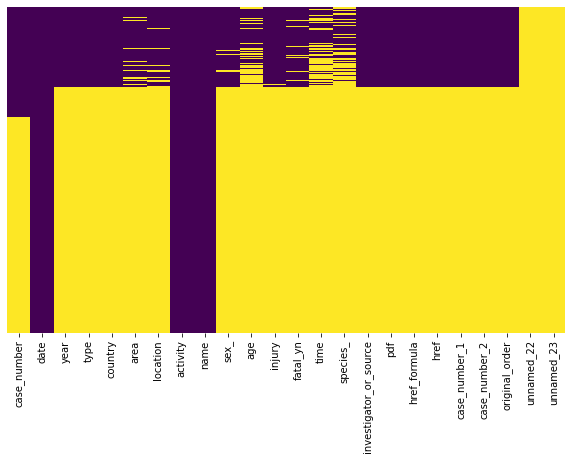

In [7]:
if df['sex_'].item == 'M': df['name'][df['name'].isnull()] = 'male'
    
elif df['sex_'].item == 'F': df['name'][df['name'].isnull()] = 'female'
    
else: df['name'][df['name'].isnull()] = 'Anonymous'
   
df['name'][(df['name']=='Unidentified') | (df['name']=='Unknown')] = 'Anonymous'

getGraphic(df)

### AGE column
#### Aquí hemos sacado la media y las hemos metido a los null, ya que, de no saber el dato, siendo una edad,  podemos suponer que como poco pertenece a la media

<AxesSubplot:>

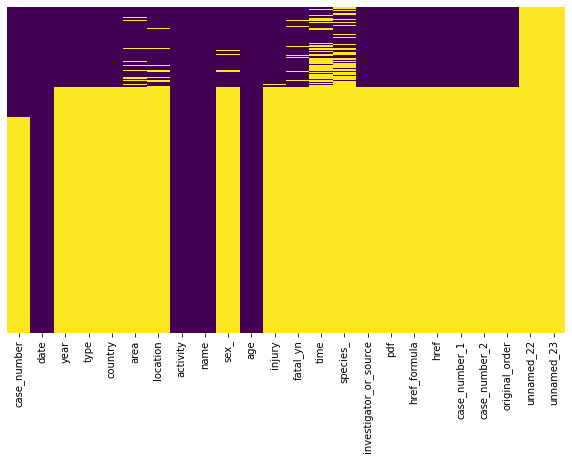

In [8]:
df['age'] = df['age'].astype(str)

df['age'] = df.age.str.extract(r'(\d\d)')

df['age'] = df['age'].astype(float)

mean_age = df['age'].mean()

df['age'].fillna(np.round(mean_age), inplace = True)

getGraphic(df)

### INJURY column
#### De locos, he buscado palabras claves CTRL+F no me ha llevado más de 5 min categorizarlas por las más comunes y más o menos se puede entender las injurias más repetidas

<AxesSubplot:>

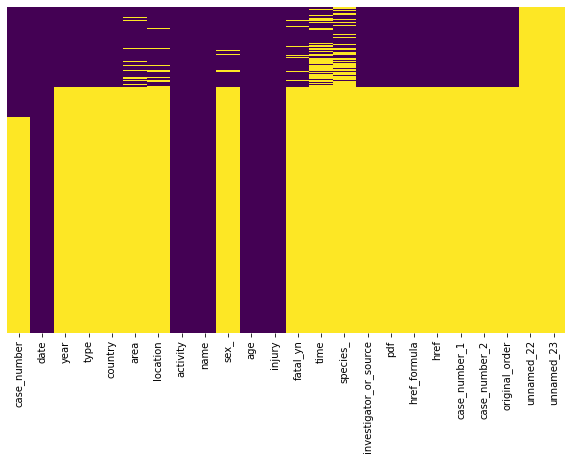

In [9]:
df.injury.fillna('NO DETAILS',inplace = True)

lst_injury = ['fatal','bite','no injury','bitten','survived','lacerated','puncture','abrasion','abrasions','involvement'
              'no details','killed','laceration','severed','injur','drowning','recovered','cut','provoked incident']

setChange(df, 'injury', lst_injury)

getGraphic(df)

### FATAL_YN column
#### Ni idea de qué es N, ni idea de qué es Y, ni na de na. Tomamos como unknown

<AxesSubplot:>

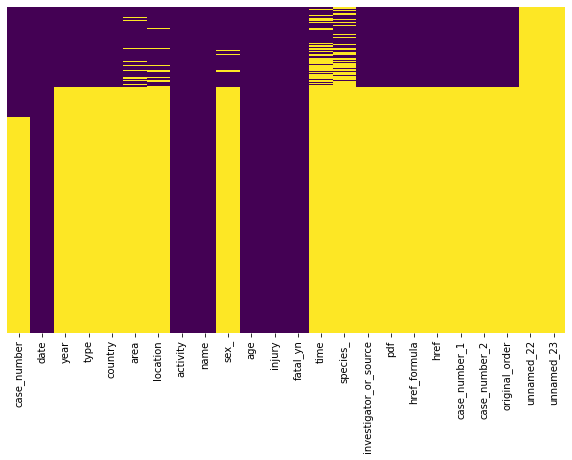

In [10]:
df['fatal_yn'].fillna('UNKNOWN', inplace = True)

df['fatal_yn'] = df['fatal_yn'].str.replace(' ','')

df['fatal_yn'][(df['fatal_yn']!='N') & (df['fatal_yn']!='Y')] = 'UNKNOWN'

getGraphic(df)

### YEAR column

#### Pffff.... ¿Con la media?

<AxesSubplot:>

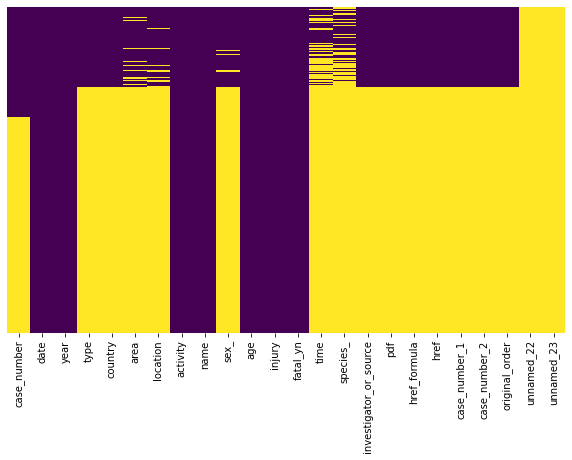

In [11]:
df['year'].fillna(df.year.mean(),inplace = True)

df['year'] = df['year'].astype(int)

getGraphic(df)

### TIME column

#### fillna nullitos por 'unknown' y el código con el peor sentido de la historia... bueno eso que datos organizados de forma tan ambigua como "ocurrió de día", "no, pues ocurrió de noche, no sé qué.."

<AxesSubplot:>

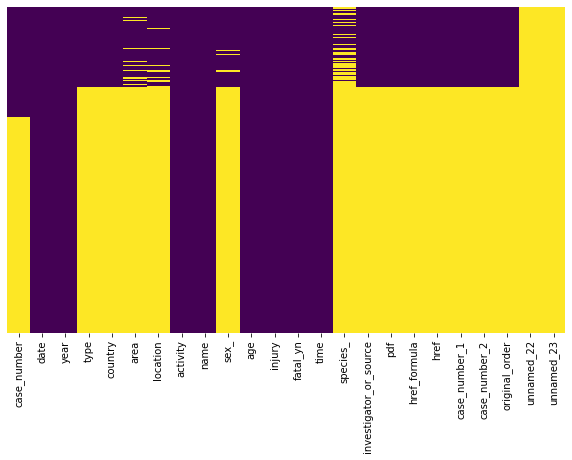

In [12]:
df['time'] = df.time.str.replace(r'([> <-])','')

lst_early = ['05','06','07','08']

lst_morning = ['09','10','11','12']

lst_afternoon = ['13','14','15','16']

lst_evening = ['17','18','19','20']

lst_night = ['21','22','23','24']

lst_after = ['01','02','03','04']

times = ['Early morning','Morning','Afternooon','Evening','Night','After midnight']

for i in range(len(df['time'])-1):
    
    if type(df['time'][i]) == str:
    
        if df['time'][i][0:2] in lst_early: df['time'][i] = 'Early morning'

        elif (df['time'][i][0:2] in lst_morning): df['time'][i] = 'Morning'
            
        elif df['time'][i][0:2] in lst_afternoon: df['time'][i] = 'Afternoon'
            
        elif df['time'][i][0:2] in lst_evening: df['time'][i] = 'Evening'
            
        elif df['time'][i][0:2] in lst_night: df['time'][i] = 'Night'
            
        elif df['time'][i][0:2] in lst_after: df['time'][i] = 'After midnight'
            
        elif 'night' in df['time'][i]: df['time'][i] = 'Night'
            
        elif 'after' in df['time'][i]: df['time'][i] = 'Afternoon'
            
        elif 'morning' in df['time'][i]: df['time'][i] = 'Morning'
        
        elif 'sun' in df['time'][i]: df['time'][i] = 'Morning'
        
        elif 'dusk' in df['time'][i]: df['time'][i] = 'Night'

        elif df['time'][i] not in times: df['time'][i] = 'unknown'
        
        else: continue

    else: continue
    
df['time'].fillna('unknown', inplace = True)

getGraphic(df)

### SPECIES column

#### fillna null por unidentified specie y organizados por categoría general de especie, y con los que tenían datos de medida los he encasquetao en una sola categoría, de locos

<AxesSubplot:>

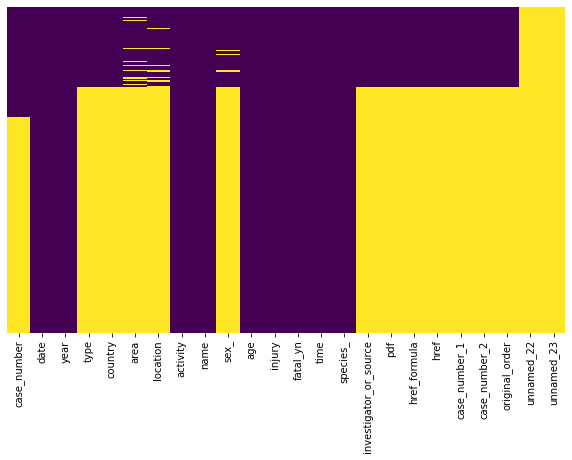

In [13]:
df['species_'].fillna('unidentified specie', inplace = True)

df['species_'][~df['species_'].str.contains('shark')] ='unidentified specie'

list_species = ['zambesi','wobbegong','bull','spinner','raggedtooth','white','tiger',
                'mako','blue','whaler','black','galapagos','silky','angel','dog'
                'lemon','cookie','nurse','basking','sand','sevengill','hammerhead',
                'small','caribbean','dusky','silky','reef','brown','involvement']

df['species_'][df['species_'].str.contains(r"([\d][ ]?[ ]?[m])|([\d][']?)",regex=True)] = 'GENERAL SPECIES WITH MEASUREMENT'

setSpecie(df,'species_',list_species)

df['species_'] = df['species_'].str.lower()

getGraphic(df)

### UNNAMED columns

#### EN SERIO QUÉ COJONES ES ESTO ME CAGO EN DIOS YA PERO QUE ME QUIERES DECIR CON QUE PARE AQUÍ, QUE COÑO TIENE QUE VER UNA CIUDAD DE ROMA CON EL CAMBIO DE ARCHIVO NO ENTIENDO NADA SOCORRO

In [14]:
print(getDic(df,'unnamed_22') , getDic(df,'unnamed_23'))

{'stopped here': 1} {'Teramo': 1, 'change filename': 1}


<AxesSubplot:>

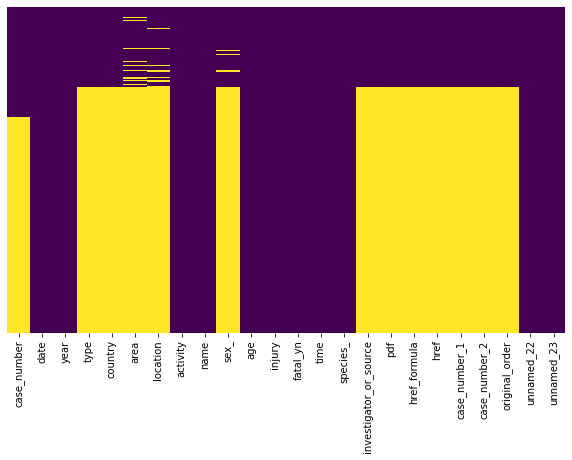

In [15]:
df['unnamed_22'].fillna('Fran Perea el que lo lea', inplace = True)

df['unnamed_23'].fillna('El que lo lea, auténtico Fran Perea', inplace = True)

getGraphic(df)

### COUNTRY, AREA, LOCATION columns
#### Easy no? Con área por lo menos le hemos añadido un toquecito, pero vamos, que unknown de los cielos santificado sea su nombre

<AxesSubplot:>

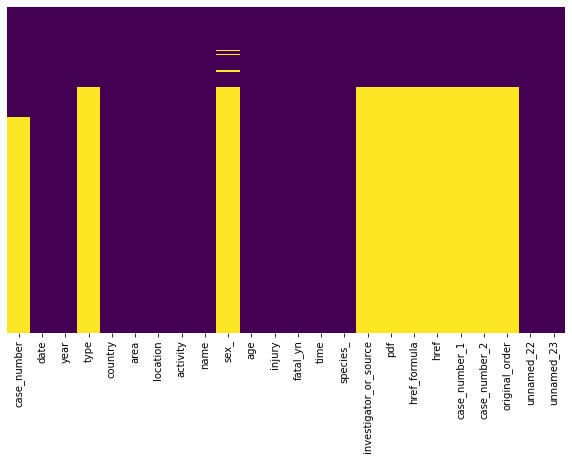

In [16]:
df['country'].fillna('unknown', inplace = True)

df['area'][df['area'].isnull()] = 'Some area from ' + df['country']

df['location'][df['location'].isnull()] = 'unknown'

getGraphic(df)

### SEX_ column 
#### Pues unknown y otros valores random a mamarla

<AxesSubplot:>

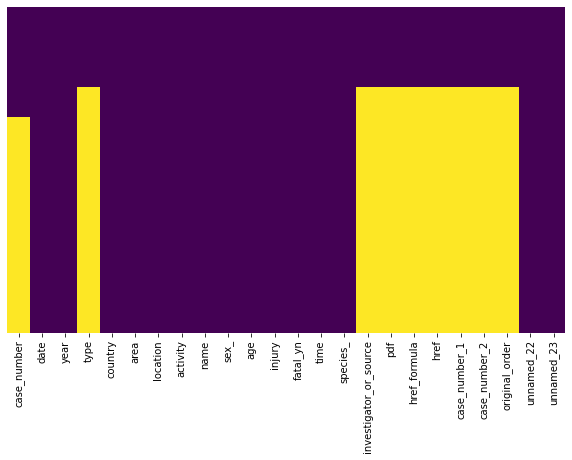

In [17]:
if df['name'].item == 'female': df['sex_'][df['sex_'].isnull()] = 'F'
    
elif df['name'].item == 'male': df['sex_'][df['sex_'].isnull()] = 'M'
    
else: df['sex_'][df['sex_'].isnull()] = 'unknown'

df['sex_']= df['sex_'].str.replace(' ','').str.replace('N','unknown').str.replace('lli','unknown').str.replace('.','unknown')

getGraphic(df)

### CASE NUMBER, TYPE, INVESTIGATOR_OR_SOURCE, PDF, HREF_FORMULA, HREF, CASE_NUMBER_1, CASE_NUMER_2, ORIGINAL_ORDER columns

#### Lo que tienen en común estas columnas es que están guays, quiero decir, poco se puede hacer con ellas.

<AxesSubplot:>

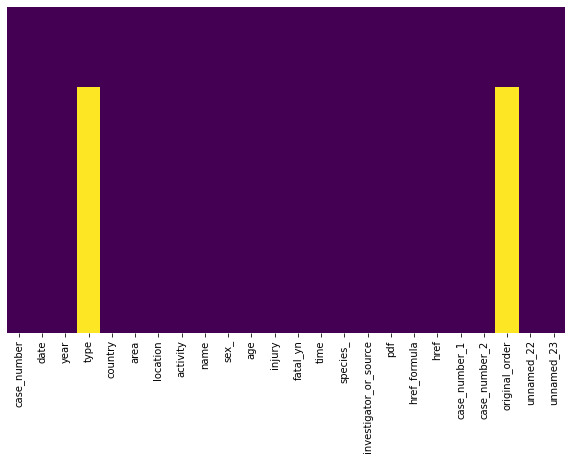

In [18]:
df['case_number'].fillna('unknown', inplace = True)

df['investigator_or_source'].fillna('Unknown', inplace = True)

df['pdf'].fillna('unknown', inplace = True)

df['href_formula'].fillna('unknown', inplace = True)

df['href'].fillna('unknown', inplace = True)

df['case_number_1'].fillna('unknown', inplace = True)

df['case_number_2'].fillna('unknown', inplace = True)

getGraphic(df)

#### En TYPE hemos fillnull con 'questionable' ya que se refiere a esa ambigüedad del caso. En ORIGINAL ORDER quiero hacer fillnull con valores aleatorios entre sus index, pero no he sido capaz...

In [19]:
df['type'].fillna('Questionable', inplace = True)

df.original_order.fillna(df.original_order.median(), inplace = True)

## CÓMO TE QUEDAS

<AxesSubplot:>

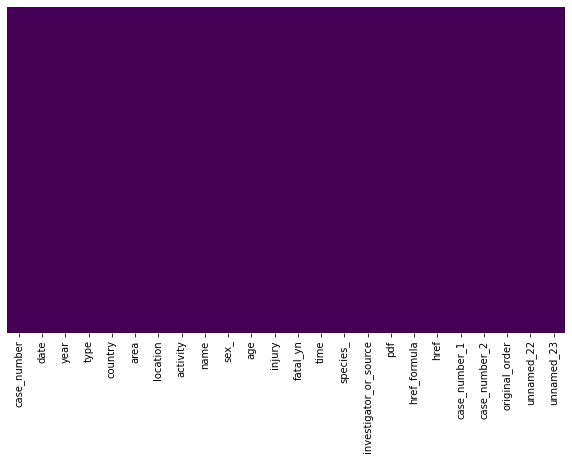

In [20]:
getGraphic(df)

In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             25723 non-null  object 
 1   date                    25723 non-null  object 
 2   year                    25723 non-null  int32  
 3   type                    25723 non-null  object 
 4   country                 25723 non-null  object 
 5   area                    25723 non-null  object 
 6   location                25723 non-null  object 
 7   activity                25723 non-null  object 
 8   name                    25723 non-null  object 
 9   sex_                    25723 non-null  object 
 10  age                     25723 non-null  float64
 11  injury                  25723 non-null  object 
 12  fatal_yn                25723 non-null  object 
 13  time                    25723 non-null  object 
 14  species_                25723 non-null

In [22]:
df.describe()

,year,age,original_order
count,25723.000000,25723.000000,25723.000000
mean,1927.066711,28.005715,3155.999922
std,139.113614,4.884420,901.982067
min,0.000000,10.000000,2.000000
25%,1927.000000,28.000000,3156.000000
50%,1927.000000,28.000000,3156.000000
75%,1927.000000,28.000000,3156.000000
max,2018.000000,87.000000,6310.000000


In [23]:
df.species_.value_counts()

unidentified specie                                                                           22814
general species with measurement                                                               2048
white shark                                                                                     222
tiger shark                                                                                     105
bull shark                                                                                       80
                                                                                              ...  
zambezi shark (tooth fragments recovered)                                                         1
questionable incident; reported as shark attack but thought to involve a pinniped instead         1
reported as a shark attack, the story was a hoax                                                  1
"gray shark"                                                                                      1


In [24]:
df.activity.value_counts()

unknown activity near water                      19968
FISHING                                           1152
SURFING                                           1117
SWIMMING                                          1101
DIVING                                             527
                                                 ...  
helping friend land hooked shark                     1
splashing in surf                                    1
treading water while alongside capsized yacht        1
catching sharks under government contract            1
wreck of  large double sailing canoe                 1
Name: activity, Length: 743, dtype: int64

In [25]:
df.age.value_counts()

28.0    22484
17.0      156
18.0      153
20.0      151
19.0      143
        ...  
72.0        1
87.0        1
67.0        1
81.0        1
82.0        1
Name: age, Length: 73, dtype: int64

In [27]:
df.injury.value_counts()

no details                                                                                                           19492
FATAL                                                                                                                 1362
BITTEN                                                                                                                1249
NO INJURY                                                                                                              802
LACERATION                                                                                                             759
                                                                                                                     ...  
reported by media as shark attack but forensic evidence indicated the kayaker died prior to any shark involvement        1
board rammed by shark, skegs knocked loose & 5' strip of fiberglass torn off, thigh scratched by sharks teeth           1
doubtful inciden

In [30]:
df.year.value_counts()

1927    19442
2015      143
2017      136
2016      130
2011      128
        ...  
1786        1
1785        1
1784        1
1783        1
1841        1
Name: year, Length: 249, dtype: int64

In [31]:
df.time.value_counts()

unknown           23068
Afternoon           968
Morning             899
Evening             447
Early morning       223
Night                91
After midnight       27
Name: time, dtype: int64

In [32]:
df.country.value_counts()

unknown                  19471
USA                       2229
AUSTRALIA                 1338
SOUTH AFRICA               579
PAPUA NEW GUINEA           134
                         ...  
THE BALKANS                  1
NORTH ATLANTIC OCEAN         1
MAYOTTE                      1
GABON                        1
CEYLON (SRI LANKA)           1
Name: country, Length: 213, dtype: int64

In [33]:
df.sex_.value_counts()

unknown    19990
M           5096
F            637
Name: sex_, dtype: int64